<a href="https://colab.research.google.com/github/rurusasu/Python/blob/develop/%E5%88%9D%E3%82%81%E3%81%A6%E3%81%AE%E3%82%A2%E3%83%A4%E3%83%A1%E5%88%86%E9%A1%9E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [0]:
# scilit-learnの様々な機能をimport
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC

In [0]:
# アヤメインスタンスを生成する
DataSet = load_iris()

In [0]:
# アヤメデータの中身を確認する
print("与えられたデータ")
print(DataSet.data)
print(DataSet.data.shape)
print('-----------------')
print('予測するデータ')
print(DataSet.target)
print(DataSet.target.shape)
print(DataSet.target_names)

与えられたデータ
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6

In [0]:
# Pandasの定義
DataSet_data = pd.DataFrame(DataSet.data, columns=['がく片の長さ', 'がく片の幅', '花びらの長さ', '花びらの幅'])
DataSet_target = pd.DataFrame(DataSet.target, columns=['花の種類'])
DataSet_all = pd.concat([DataSet_data, DataSet_target], axis=1)
DataSet_all.head(10)

,がく片の長さ,がく片の幅,花びらの長さ,花びらの幅,花の種類
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [0]:
# 学習用とテスト用の説明変数と目的変数を定義する
train_data, test_data, train_label, test_label = train_test_split(DataSet_data, DataSet_target, test_size=0.33)
#train_data.head(5)
#train_data.describe()
#test_data.head(5)
train_label.head(5)
#test_label.head(5)

,花の種類
129,2
92,1
97,1
50,1
23,0


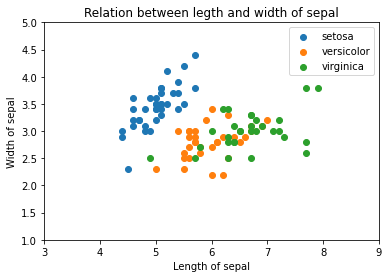

In [0]:
# がく片の長さと幅の分布
plt.scatter(train_data[train_label['花の種類']==0]['がく片の長さ'], train_data[(train_label == 0).values]['がく片の幅'], label='setosa', cmap='rgb')
plt.scatter(train_data[train_label['花の種類']==1]['がく片の長さ'], train_data[(train_label == 1).values]['がく片の幅'], label='versicolor', cmap='rgb')
plt.scatter(train_data[train_label['花の種類']==2]['がく片の長さ'], train_data[(train_label == 2).values]['がく片の幅'], label='virginica', cmap='rgb')

# X軸の範囲を指定
plt.xlim(3, 9)
# Y軸の範囲を指定
plt.ylim(1, 5)

# X軸の名前
plt.xlabel('Length of sepal')
# Y軸の名前
plt.ylabel('Width of sepal')

# グラフのタイトル
plt.title('Relation between legth and width of sepal')
# 凡例を出力
plt.legend()

In [0]:
# bool値でDataFrameが返ってくる
train_label == 0
# bool値でSeriesが返ってくる
train_label['花の種類'] == 0
# np行列でbool値の2次元配列が返ってくる
(train_label == 0).values
# np行列でbool値の1次元配列が返ってくる
(train_label['花の種類'] == 0).values

# このとき，train_data[train_label['花の種類']==0]と
# train_data[(train_label == 0).values]が全く同じ値を返す

array([False, False, False, False,  True, False,  True,  True, False,
        True, False, False, False, False, False, False, False, False,
        True,  True, False,  True, False, False, False, False,  True,
       False, False, False,  True, False, False, False, False,  True,
       False, False,  True, False, False, False, False,  True,  True,
       False, False,  True, False,  True, False,  True,  True, False,
       False, False, False, False,  True, False,  True,  True,  True,
        True,  True,  True, False,  True, False, False, False, False,
        True, False,  True,  True, False, False,  True, False, False,
       False,  True, False,  True, False, False, False,  True,  True,
        True, False, False,  True, False,  True, False, False, False,
        True])

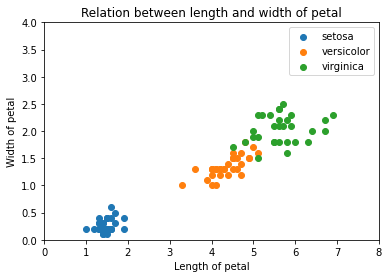

In [0]:
# 花びらの長さと幅の分布
plt.scatter(train_data[train_label['花の種類'] == 0]['花びらの長さ'], train_data[(train_label == 0).values]['花びらの幅'], label='setosa', cmap='rgb')
plt.scatter(train_data[train_label['花の種類'] == 1]['花びらの長さ'], train_data[(train_label == 1).values]['花びらの幅'], label='versicolor', cmap='rgb')
plt.scatter(train_data[train_label['花の種類'] == 2]['花びらの長さ'], train_data[(train_label == 2).values]['花びらの幅'], label='virginica', cmap='rgb')

plt.xlim(0,8)
plt.ylim(0,4)

plt.xlabel('Length of petal')
plt.ylabel('Width of petal')

plt.title('Relation between length and width of petal')
plt.legend()

In [0]:
# 2つの特徴量を作成する

# がく片コンビのDataFrameを作成する
gakuhen_train = train_data.loc[:, ['がく片の長さ', 'がく片の幅']]

# 花びらコンビのDataFrameを作成する
hanabira_train = train_data.loc[:, ['花びらの長さ', '花びらの幅']]

In [0]:
# LinearSVMでモデル構築⇒学習⇒予測する

## それぞれのモデルを構築
gakuhen_model = LinearSVC()
hanabira_model = LinearSVC()


## それぞれのモデルに学習させる
gakuhen_model.fit(gakuhen_train, train_label)
hanabira_model.fit(hanabira_train, train_label)

## それぞれのモデルで予測させて、予測値を代入させる
## モデルが《がく片の長さと幅》を使って学習しているので，予測するときも《がく片の長さと幅》を渡す必要がある．
gakuhen_predict = gakuhen_model.predict(test_data.loc[:,['がく片の長さ', 'がく片の幅']])
## モデルが《花びらの長さと幅》を使って学習しているので，予測するときも《花びらの長さと幅》を渡す必要がある．
hanabira_predict = hanabira_model.predict(test_data.loc[:,['花びらの長さ', '花びらの幅']])

In [0]:
# accuracy_scoreを使う

## sklearnライブラリからscore算出用の関数をimport 
from sklearn.metrics import accuracy_score

## gakuhen_scoreとhanabira_scoreそれぞれに結果を代入
gakuhen_score = accuracy_score(test_label, gakuhen_predict)
hanabira_score = accuracy_score(test_label, hanabira_predict)

print('がく片の長さと幅コンビの正解率:{}'.format(gakuhen_score), '花びらの長さと幅コンビの正解率:{}'.format(hanabira_score))

がく片の長さと幅コンビの正解率:0.74 花びらの長さと幅コンビの正解率:0.94


In [0]:
# 2つの結果の違いについて詳しく見る
# そのために分類の境界を可視化する

def heacet_border_check(H, M, model, param1, param2, resolution=0.01):
    H1_min, H1_max = H[param1].min()-0.5, H[param1].max()+0.5
    H2_min, H2_max = H[param2].min()-0.5, H[param2].max()+0.5
    H1, H2 = np.meshgrid(np.arange(H1_min, H1_max, resolution),
                        np.arange(H2_min, H2_max, resolution))
    n = np.array([H1.ravel(), H2.ravel()]).T
    Z = model.predict(n)
    Z = Z.reshape(H1.shape)
    plt.contourf(H1, H2, Z, alpha=0.5, cmap="Set2")
    plt.xlim(H1_min, H1_max)
    plt.ylim(H2_min, H2_max)
    plt.xlabel("Length")
    plt.ylabel("Width")
    plt.scatter(H[param1],H[param2], c=M["花の種類"], cmap="brg")

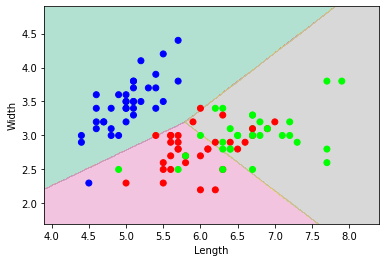

In [0]:
# 作成した関数を使って
# がく片コンビの分類の境界を可視化する
heacet_border_check(train_data, train_label, gakuhen_model, 'がく片の長さ', 'がく片の幅')

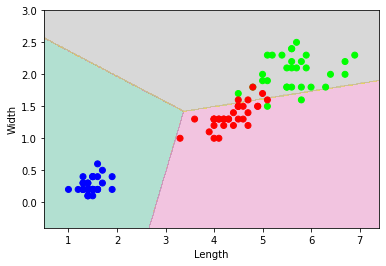

In [0]:
# 作成した関数を使って
# 花びらコンビの分類の境界を可視化する
heacet_border_check(train_data, train_label, hanabira_model, '花びらの長さ', '花びらの幅')